In [3]:
# 1. 加载波士顿房价数据集：
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [4]:
# 查看数据集的基本情况：

In [5]:
train_data.shape

(404, 13)

In [6]:
test_data.shape

(102, 13)

In [7]:
train_data[0]  # 每个特征都有不同的取值范围

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [8]:
train_targets.shape

(404,)

In [9]:
# 2. 准备数据

# 由上述可知，数据集包含的每个特征的取值范围都不相同，需要进行标准化/归一化：
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std
# 注意，用于测试红素局标准化的均值和标准差都是在训练数据上计算得到的. 
# 在训练过程中不能使用任何在测试数据上得到的结果.

In [10]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [11]:
test_data[0]

array([ 1.55369355, -0.48361547,  1.0283258 , -0.25683275,  1.03838067,
        0.23545815,  1.11048828, -0.93976936,  1.67588577,  1.5652875 ,
        0.78447637, -3.48459553,  2.25092074])

In [12]:
# 3. 构建网络，定义模型：
from keras import layers, models

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(loss='mse', metrics=['mae'], optimizer='rmsprop')
    return model

In [13]:
# 由于本例的数据集只包含404个用于训练的样本，在此基础上划分出来的验证集会非常小，
# 因此，验证分数可能会有很大的波动. 在这种情况下，最佳实践是使用K折交叉验证.

In [14]:
# 4. 使用K折交叉验证：
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print("Processing fold #", i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

W0428 17:17:56.502127 19220 deprecation_wrapper.py:119] From G:\Python\fakeras\venv\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



Processing fold # 0


W0428 17:17:57.174147 19220 deprecation_wrapper.py:119] From G:\Python\fakeras\venv\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



W0428 17:17:57.279145 19220 deprecation_wrapper.py:119] From G:\Python\fakeras\venv\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



W0428 17:17:57.426135 19220 deprecation_wrapper.py:119] From G:\Python\fakeras\venv\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



W0428 17:17:57.891125 19220 deprecation_wrapper.py:119] From G:\Python\fakeras\venv\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



W0428 17:17:57.898125 19220 deprecation_wrapper.py:119] From G:\Python\fakeras\venv\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Processing fold # 1


Processing fold # 2


Processing fold # 3


In [16]:
# 5. 保存每折的验证结果：
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print("Processing fold #", i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                         validation_data=(val_data, val_targets),
                         epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

Processing fold # 0


Processing fold # 1


Processing fold # 2


Processing fold # 3


In [15]:
# 6. 计算所有轮次中的K折验证分数的平均值：
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

NameError: name 'all_mae_histories' is not defined

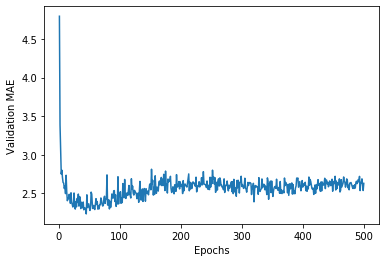

In [17]:
# 7. 绘制验证分数
import matplotlib.pyplot as plt

plt.xlabel("Epochs")
plt.ylabel("Validation MAE")

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.show()

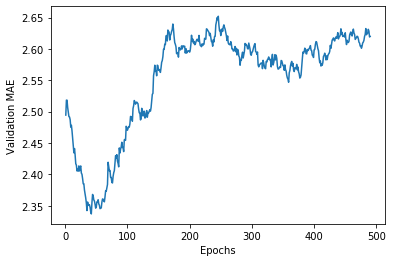

In [18]:
# 8. 使用指数加权平均绘制更加平滑的验证分数曲线
def smoothing(x, factor=0.9):
    y = []
    for i in x:
        if y:
            pre = y[-1]
            y.append(factor * pre + (1 - factor) * i)
        else:
            y.append(i)
    return y
    
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")

smooth_mae_history = average_mae_history[10:]  # 删除前10个数据点
smooth_mae_history = smoothing(smooth_mae_history)

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [19]:
# 9. 训练最终模型

# 从步骤8所得的图示中可以看出，MAE在70轮左右之后不再显著降低：
model = build_model()
model.fit(train_data, train_targets, epochs=70, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 1ms/step


In [20]:
print(test_mse_score, test_mae_score)

16.580626843022365 2.642841049269134
